**Doutorado em Sensoriamento Remoto** \
**Disciplina de princípios físicos** \
**Instrutores**: Rejane Paulino, Daniel Maciel, Natália Rudorff

# Prática 2 - Correção Atmosférica

Código adaptado por Henrique Leão
[Repositório no GitHub](https://github.com/Liaons/Physical_principles_practice2)

# Montando o ambiente Py6s

In [1]:
!pip install py6s -q
!apt install gfortran libgfortran5 -q
!wget https://anaconda.org/conda-forge/sixs/1.1.3/download/linux-64/sixs-1.1.3-h2cc385e_2.tar.bz2 -q
!tar -xvf sixs-1.1.3-h2cc385e_2.tar.bz2
!rm sixs-1.1.3-h2cc385e_2.tar.bz2
!chmod +x bin/sixs
!ln bin/sixs /usr/local/bin/sixs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.8 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
gfortran is already the newest version (4:11.2.0-1ubuntu1).
libgfortran5 is already the newest version (12.3.0-1ubuntu1~22.04).
libgfortran5 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
info/files
info/paths.json
info/hash_input.json
info/index.json
info/about.json
info/git
bin/sixs
info/recipe/no_ffpe-summary.patch
info/recipe/meta.yaml.template
info/recipe/conda_build_config.yaml
info/recipe/meta.yaml
info/test/Example_In_1.txt
info/recipe/Example_In_1.txt
info/test/Example_In_3.txt
info/recipe/Example_In_3.txt
info/licenses/LICENSE.md
info/recipe/run_test.sh
info/test/r

In [4]:
# Bibliotecas

from Py6S import *
import numpy as np
import pandas as pd
import glob
from osgeo import gdal
gdal.UseExceptions()

# Tabelas

In [5]:
import pandas as pd
from io import StringIO
infor = """
S2B/MSI RSR
converted to text file
source: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-2-msi/document-library/-/asset_publisher/Wk0TKajiISaR/content/sentinel-2a-spectral-responses
"""

tabela_rsr = """
wavelength	rsr	band	id
0.411	6.24E-03	B1	1
0.412	1.02E-02	B1	1
0.413	4.03E-03	B1	1
0.414	6.42E-03	B1	1
0.415	5.53E-03	B1	1
0.416	6.55E-03	B1	1
0.417	4.10E-03	B1	1
0.418	6.30E-03	B1	1
0.419	4.37E-03	B1	1
0.42	2.33E-03	B1	1
0.421	5.82E-04	B1	1
0.422	2.02E-03	B1	1
0.423	2.94E-03	B1	1
0.424	4.85E-03	B1	1
0.425	3.17E-03	B1	1
0.426	2.38E-03	B1	1
0.427	2.35E-03	B1	1
0.428	4.40E-03	B1	1
0.429	1.29E-02	B1	1
0.43	0.05001678	B1	1
0.431	0.18650104	B1	1
0.432	0.45441623	B1	1
0.433	0.72307877	B1	1
0.434	0.83999211	B1	1
0.435	0.86456334	B1	1
0.436	0.87472096	B1	1
0.437	0.89215296	B1	1
0.438	0.91090814	B1	1
0.439	0.92588017	B1	1
0.44	0.93924094	B1	1
0.441	0.94491826	B1	1
0.442	0.95078529	B1	1
0.443	0.96803023	B1	1
0.444	0.99939195	B1	1
0.445	1	B1	1
0.446	0.97548364	B1	1
0.447	0.96148351	B1	1
0.448	0.94986211	B1	1
0.449	0.91841452	B1	1
0.45	0.87989802	B1	1
0.451	0.80383677	B1	1
0.452	0.59752075	B1	1
0.453	0.30474132	B1	1
0.454	0.10798014	B1	1
0.455	0.0304465	B1	1
0.456	0.00885119	B1	1
0.456	0.05529541	B2	2
0.457	0.12005068	B2	2
0.458	0.25199051	B2	2
0.459	0.4623617	B2	2
0.46	0.65162379	B2	2
0.461	0.77642171	B2	2
0.462	0.82319091	B2	2
0.463	0.83083116	B2	2
0.464	0.83382106	B2	2
0.465	0.837526	B2	2
0.466	0.86304286	B2	2
0.467	0.88226141	B2	2
0.468	0.90486326	B2	2
0.469	0.92043837	B2	2
0.47	0.93602675	B2	2
0.471	0.930533	B2	2
0.472	0.92714067	B2	2
0.473	0.9161479	B2	2
0.474	0.90551724	B2	2
0.475	0.89745515	B2	2
0.476	0.90266694	B2	2
0.477	0.90854264	B2	2
0.478	0.92047913	B2	2
0.479	0.92417935	B2	2
0.48	0.91845025	B2	2
0.481	0.90743244	B2	2
0.482	0.89733983	B2	2
0.483	0.88646415	B2	2
0.484	0.87189983	B2	2
0.485	0.85643973	B2	2
0.486	0.84473414	B2	2
0.487	0.84190734	B2	2
0.488	0.85644111	B2	2
0.489	0.87782724	B2	2
0.49	0.90261174	B2	2
0.491	0.91840544	B2	2
0.492	0.94585847	B2	2
0.493	0.96887192	B2	2
0.494	0.99336135	B2	2
0.495	0.99927899	B2	2
0.496	1	B2	2
0.497	0.99520325	B2	2
0.498	0.98412711	B2	2
0.499	0.97947473	B2	2
0.5	0.97808297	B2	2
0.501	0.97213439	B2	2
0.502	0.96277794	B2	2
0.503	0.95342234	B2	2
0.504	0.93802376	B2	2
0.505	0.92460144	B2	2
0.506	0.90932642	B2	2
0.507	0.90192251	B2	2
0.508	0.89184298	B2	2
0.509	0.88963556	B2	2
0.51	0.89146958	B2	2
0.511	0.89877911	B2	2
0.512	0.91056869	B2	2
0.513	0.92427362	B2	2
0.514	0.93823555	B2	2
0.515	0.95311791	B2	2
0.516	0.97150808	B2	2
0.517	0.98737003	B2	2
0.518	0.99658514	B2	2
0.519	0.99367959	B2	2
0.52	0.98144714	B2	2
0.521	0.95874415	B2	2
0.522	0.89291635	B2	2
0.523	0.73566218	B2	2
0.524	0.52060373	B2	2
0.525	0.3322804	B2	2
0.526	0.19492197	B2	2
0.527	0.11732617	B2	2
0.528	0.07507304	B2	2
0.529	0.05094154	B2	2
0.53	0.03213016	B2	2
0.531	0.01510217	B2	2
0.532	0.00447984	B2	2
0.536	0.00188039	B3	3
0.537	0.01545903	B3	3
0.538	0.03660414	B3	3
0.539	0.08100583	B3	3
0.54	0.16917887	B3	3
0.541	0.33278274	B3	3
0.542	0.58622794	B3	3
0.543	0.80916412	B3	3
0.544	0.913051	B3	3
0.545	0.94472284	B3	3
0.546	0.94898813	B3	3
0.547	0.94369132	B3	3
0.548	0.92845674	B3	3
0.549	0.91256938	B3	3
0.55	0.90078036	B3	3
0.551	0.89958598	B3	3
0.552	0.90547138	B3	3
0.553	0.92045355	B3	3
0.554	0.94065665	B3	3
0.555	0.96199681	B3	3
0.556	0.98186744	B3	3
0.557	0.9985841	B3	3
0.558	1	B3	3
0.559	0.99279888	B3	3
0.56	0.97801325	B3	3
0.561	0.95301174	B3	3
0.562	0.9266333	B3	3
0.563	0.89359131	B3	3
0.564	0.86941793	B3	3
0.565	0.84827	B3	3
0.566	0.83908301	B3	3
0.567	0.83206209	B3	3
0.568	0.8291787	B3	3
0.569	0.83305844	B3	3
0.57	0.84630939	B3	3
0.571	0.86396307	B3	3
0.572	0.87268076	B3	3
0.573	0.86818339	B3	3
0.574	0.8554947	B3	3
0.575	0.80839054	B3	3
0.576	0.67650876	B3	3
0.577	0.45584205	B3	3
0.578	0.24737576	B3	3
0.579	0.12765465	B3	3
0.58	0.0589016	B3	3
0.581	0.02564742	B3	3
0.582	0.00515905	B3	3
0.646	0.00499358	B4	4
0.647	0.02642563	B4	4
0.648	0.11905127	B4	4
0.649	0.333204	B4	4
0.65	0.59813448	B4	4
0.651	0.80612041	B4	4
0.652	0.91152955	B4	4
0.653	0.92179127	B4	4
0.654	0.91677167	B4	4
0.655	0.90751672	B4	4
0.656	0.89867522	B4	4
0.657	0.89413622	B4	4
0.658	0.89685141	B4	4
0.659	8.99E-01	B4	4
0.66	9.02E-01	B4	4
0.661	9.07E-01	B4	4
0.662	9.16E-01	B4	4
0.663	9.29E-01	B4	4
0.664	9.43E-01	B4	4
0.665	9.56E-01	B4	4
0.666	9.69E-01	B4	4
0.667	9.83E-01	B4	4
0.668	9.92E-01	B4	4
0.669	1.00E+00	B4	4
0.67	9.99E-01	B4	4
0.671	9.93E-01	B4	4
0.672	9.79E-01	B4	4
0.673	9.66E-01	B4	4
0.674	9.54E-01	B4	4
0.675	9.41E-01	B4	4
0.676	9.22E-01	B4	4
0.677	8.93E-01	B4	4
0.678	8.35E-01	B4	4
0.679	6.98E-01	B4	4
0.68	4.95E-01	B4	4
0.681	2.79E-01	B4	4
0.682	1.09E-01	B4	4
0.683	3.03E-02	B4	4
0.684	7.47E-03	B4	4
0.685	8.71E-04	B4	4
0.694	1.04E-02	B5	5
0.695	5.71E-02	B5	5
0.696	2.15E-01	B5	5
0.697	5.47E-01	B5	5
0.698	8.71E-01	B5	5
0.699	9.68E-01	B5	5
0.7	9.91E-01	B5	5
0.701	1.00E+00	B5	5
0.702	9.95E-01	B5	5
0.703	9.88E-01	B5	5
0.704	9.79E-01	B5	5
0.705	0.97035979	B5	5
0.706	0.95875454	B5	5
0.707	0.94130694	B5	5
0.708	0.92531149	B5	5
0.709	0.89283152	B5	5
0.71	0.76531084	B5	5
0.711	0.50228771	B5	5
0.712	0.17957688	B5	5
0.713	0.0337948	B5	5
0.714	0.00240526	B5	5
0.73	0.01739744	B6	6
0.731	0.10565746	B6	6
0.732	0.38571484	B6	6
0.733	0.78168196	B6	6
0.734	0.90518378	B6	6
0.735	0.91562509	B6	6
0.736	0.92258804	B6	6
0.737	0.93134141	B6	6
0.738	0.9469604	B6	6
0.739	0.96535098	B6	6
0.74	0.97817455	B6	6
0.741	0.99107716	B6	6
0.742	0.99990615	B6	6
0.743	1	B6	6
0.744	0.97144118	B6	6
0.745	0.81937503	B6	6
0.746	0.46748011	B6	6
0.747	0.09409351	B6	6
0.748	0.00983236	B6	6
0.766	0.0103729	B7	7
0.767	0.03754921	B7	7
0.768	0.11240409	B7	7
0.769	0.25890105	B7	7
0.77	0.48035521	B7	7
0.771	0.73155954	B7	7
0.772	0.91293607	B7	7
0.773	0.97124929	B7	7
0.774	0.96391197	B7	7
0.775	0.95529249	B7	7
0.776	0.964831	B7	7
0.777	0.98628988	B7	7
0.778	1	B7	7
0.779	0.99782157	B7	7
0.78	0.98343012	B7	7
0.781	0.96489467	B7	7
0.782	0.94619093	B7	7
0.783	0.92560158	B7	7
0.784	0.90788186	B7	7
0.785	0.88471259	B7	7
0.786	0.85693094	B7	7
0.787	0.82513165	B7	7
0.788	0.7734046	B7	7
0.789	0.66767522	B7	7
0.79	0.47756609	B7	7
0.791	0.23225321	B7	7
0.792	0.06764032	B7	7
0.793	0.01301456	B7	7
0.794	0.00117425	B7	7
0.774	0.00037316	B8	8
0.775	0.00296451	B8	8
0.776	0.01663315	B8	8
0.777	0.02818619	B8	8
0.778	0.05000442	B8	8
0.779	0.08575595	B8	8
0.78	0.14871265	B8	8
0.781	0.25701156	B8	8
0.782	0.42307501	B8	8
0.783	0.62943997	B8	8
0.784	0.80112571	B8	8
0.785	0.90352196	B8	8
0.786	0.93855197	B8	8
0.787	0.94406104	B8	8
0.788	0.9474892	B8	8
0.789	0.96325767	B8	8
0.79	0.97948137	B8	8
0.791	0.99144397	B8	8
0.792	0.99630748	B8	8
0.793	1	B8	8
0.794	0.99827121	B8	8
0.795	0.99843182	B8	8
0.796	0.98914342	B8	8
0.797	0.98264167	B8	8
0.798	0.96769944	B8	8
0.799	0.95752283	B8	8
0.8	0.95074919	B8	8
0.801	0.9458125	B8	8
0.802	0.94267916	B8	8
0.803	0.9465958	B8	8
0.804	0.94450012	B8	8
0.805	0.93992861	B8	8
0.806	0.92759688	B8	8
0.807	0.91226544	B8	8
0.808	0.89079677	B8	8
0.809	0.8706102	B8	8
0.81	0.85021777	B8	8
0.811	0.83416655	B8	8
0.812	0.82214927	B8	8
0.813	0.8124078	B8	8
0.814	0.80920229	B8	8
0.815	0.80220847	B8	8
0.816	0.79081499	B8	8
0.817	0.78239761	B8	8
0.818	0.76731527	B8	8
0.819	0.75394962	B8	8
0.82	0.74226922	B8	8
0.821	0.72750987	B8	8
0.822	0.71976209	B8	8
0.823	0.71456726	B8	8
0.824	0.71982866	B8	8
0.825	0.72746214	B8	8
0.826	0.73945306	B8	8
0.827	0.75138424	B8	8
0.828	0.76310661	B8	8
0.829	0.77122498	B8	8
0.83	0.78298312	B8	8
0.831	0.78494127	B8	8
0.832	0.78409222	B8	8
0.833	0.7834498	B8	8
0.834	0.78216032	B8	8
0.835	0.78062401	B8	8
0.836	0.78132572	B8	8
0.837	0.7813272	B8	8
0.838	0.7810081	B8	8
0.839	0.77897938	B8	8
0.84	0.7761445	B8	8
0.841	0.76910534	B8	8
0.842	0.7625494	B8	8
0.843	0.75157186	B8	8
0.844	0.74086146	B8	8
0.845	0.73121299	B8	8
0.846	0.71988688	B8	8
0.847	0.71025573	B8	8
0.848	0.69679744	B8	8
0.849	0.68602501	B8	8
0.85	0.67163906	B8	8
0.851	0.65532408	B8	8
0.852	0.64173681	B8	8
0.853	0.62683353	B8	8
0.854	0.61241074	B8	8
0.855	0.60185411	B8	8
0.856	0.59380689	B8	8
0.857	0.58714687	B8	8
0.858	0.58444579	B8	8
0.859	0.58231388	B8	8
0.86	0.58111599	B8	8
0.861	0.57996902	B8	8
0.862	0.57480451	B8	8
0.863	0.57684802	B8	8
0.864	0.57273034	B8	8
0.865	0.57144461	B8	8
0.866	0.56985127	B8	8
0.867	0.57167225	B8	8
0.868	0.57154913	B8	8
0.869	0.57292235	B8	8
0.87	0.57617796	B8	8
0.871	0.5784908	B8	8
0.872	0.58023702	B8	8
0.873	0.57982619	B8	8
0.874	0.57868642	B8	8
0.875	0.57587451	B8	8
0.876	0.56976789	B8	8
0.877	0.56173136	B8	8
0.878	0.55644176	B8	8
0.879	0.54881732	B8	8
0.88	0.54508423	B8	8
0.881	0.54153848	B8	8
0.882	0.54069902	B8	8
0.883	0.53850959	B8	8
0.884	0.53655263	B8	8
0.885	0.530404	B8	8
0.886	0.52068821	B8	8
0.887	0.50399678	B8	8
0.888	0.486513	B8	8
0.889	0.46813829	B8	8
0.89	0.45468861	B8	8
0.891	0.44447936	B8	8
0.892	0.44177056	B8	8
0.893	0.44425396	B8	8
0.894	0.44633078	B8	8
0.895	0.43914074	B8	8
0.896	0.41748156	B8	8
0.897	0.3690277	B8	8
0.898	0.30165803	B8	8
0.899	0.23504284	B8	8
0.9	0.17434599	B8	8
0.901	0.12247894	B8	8
0.902	0.08354059	B8	8
0.903	0.05624109	B8	8
0.904	0.03804368	B8	8
0.905	0.02427229	B8	8
0.906	0.01490577	B8	8
0.907	0.00615862	B8	8
0.848	0.00167523	B8A	9
0.849	0.01602231	B8A	9
0.85	0.03225867	B8A	9
0.851	0.07345268	B8A	9
0.852	0.1689243	B8A	9
0.853	0.34543042	B8A	9
0.854	0.56923369	B8A	9
0.855	0.79611745	B8A	9
0.856	0.93749188	B8A	9
0.857	0.98102805	B8A	9
0.858	0.98742384	B8A	9
0.859	0.99457226	B8A	9
0.86	0.99912415	B8A	9
0.861	0.99993652	B8A	9
0.862	1	B8A	9
0.863	0.99437257	B8A	9
0.864	0.98756135	B8A	9
0.865	0.98263615	B8A	9
0.866	0.9790323	B8A	9
0.867	0.97397518	B8A	9
0.868	0.97130259	B8A	9
0.869	0.9645338	B8A	9
0.87	0.95610202	B8A	9
0.871	0.93941552	B8A	9
0.872	0.89155652	B8A	9
0.873	0.77601041	B8A	9
0.874	0.5951886	B8A	9
0.875	0.37588812	B8A	9
0.876	0.18394037	B8A	9
0.877	0.07870072	B8A	9
0.878	0.0332686	B8A	9
0.879	0.01575167	B8A	9
0.88	0.00159818	B8A	9
0.93	0.012121122	B9	10
0.931	0.046022418	B9	10
0.932	0.151408217	B9	10
0.933	0.358642184	B9	10
0.934	0.606574394	B9	10
0.935	0.837342317	B9	10
0.936	0.933378313	B9	10
0.937	0.941428569	B9	10
0.938	0.95729331	B9	10
0.939	0.989803625	B9	10
0.94	0.997444519	B9	10
0.941	1	B9	10
0.942	0.9863781	B9	10
0.943	0.974191899	B9	10
0.944	0.958968621	B9	10
0.945	0.973776634	B9	10
0.946	0.950411873	B9	10
0.947	0.94578786	B9	10
0.948	0.909973936	B9	10
0.949	0.887002674	B9	10
0.95	0.855135879	B9	10
0.951	0.836537904	B9	10
0.952	0.718536234	B9	10
0.953	0.52369103	B9	10
0.954	0.269748749	B9	10
0.955	0.09480081	B9	10
0.956	0.026387561	B9	10
0.957	0.003433415	B9	10
1.339	0.000024519	B10	11
1.34	0.000136201	B10	11
1.341	0.000124629	B10	11
1.342	0.000088936	B10	11
1.343	0.000124168	B10	11
1.344	0.000099355	B10	11
1.345	0.000139099	B10	11
1.346	0.000157557	B10	11
1.347	0.000192392	B10	11
1.348	0.00025967	B10	11
1.349	0.000322212	B10	11
1.35	0.00034665	B10	11
1.351	0.000368979	B10	11
1.352	0.000547142	B10	11
1.353	0.001050938	B10	11
1.354	0.00218105	B10	11
1.355	0.004790717	B10	11
1.356	0.011310302	B10	11
1.357	0.026613248	B10	11
1.358	0.057559739	B10	11
1.359	0.111412066	B10	11
1.36	0.19534134	B10	11
1.361	0.313481067	B10	11
1.362	0.461097437	B10	11
1.363	0.6221953	B10	11
1.364	0.770430827	B10	11
1.365	0.880535922	B10	11
1.366	0.944739275	B10	11
1.367	0.97397875	B10	11
1.368	0.98611756	B10	11
1.369	0.993032255	B10	11
1.37	0.997734947	B10	11
1.371	1	B10	11
1.372	0.999440391	B10	11
1.373	0.996198129	B10	11
1.374	0.990856204	B10	11
1.375	0.984248642	B10	11
1.376	0.977116358	B10	11
1.377	0.970164279	B10	11
1.378	0.963770069	B10	11
1.379	0.957577366	B10	11
1.38	0.951303557	B10	11
1.381	0.945493586	B10	11
1.382	0.940718335	B10	11
1.383	0.937614311	B10	11
1.384	0.936274454	B10	11
1.385	0.935168115	B10	11
1.386	0.930686598	B10	11
1.387	0.916569659	B10	11
1.388	0.885721386	B10	11
1.389	0.831894981	B10	11
1.39	0.749343254	B10	11
1.391	0.636158996	B10	11
1.392	0.498288066	B10	11
1.393	0.349944188	B10	11
1.394	0.21325372	B10	11
1.395	0.110112562	B10	11
1.396	0.048081597	B10	11
1.397	0.018603066	B10	11
1.398	0.007193874	B10	11
1.399	0.003163765	B10	11
1.4	0.001575442	B10	11
1.401	0.000851825	B10	11
1.402	0.000531218	B10	11
1.403	0.00033209	B10	11
1.404	0.000194334	B10	11
1.405	0.000220804	B10	11
1.406	0.000226309	B10	11
1.407	0.000181374	B10	11
1.408	0.000160139	B10	11
1.409	0.000154509	B10	11
1.41	0.000147455	B10	11
1.411	0.000147793	B10	11
1.412	0.000174384	B10	11
1.413	0.000234351	B10	11
1.414	0.000119559	B10	11
1.415	0.000043811	B10	11
1.538	0.0000115	B11	12
1.539	0.000026996	B11	12
1.54	0.000081157	B11	12
1.541	0.000169507	B11	12
1.542	0.000273428	B11	12
1.543	0.000343776	B11	12
1.544	0.000459515	B11	12
1.545	0.000651677	B11	12
1.546	0.0008223	B11	12
1.547	0.001076746	B11	12
1.548	0.001428776	B11	12
1.549	0.001958681	B11	12
1.55	0.002660821	B11	12
1.551	0.003682001	B11	12
1.552	0.005217308	B11	12
1.553	0.007572684	B11	12
1.554	0.011246256	B11	12
1.555	0.01713141	B11	12
1.556	0.026703068	B11	12
1.557	0.041388968	B11	12
1.558	0.062904714	B11	12
1.559	0.094492263	B11	12
1.56	0.139743066	B11	12
1.561	0.200760503	B11	12
1.562	0.281513117	B11	12
1.563	0.380879812	B11	12
1.564	0.490209915	B11	12
1.565	0.606204368	B11	12
1.566	0.714558374	B11	12
1.567	0.80351452	B11	12
1.568	0.86986655	B11	12
1.569	0.916284448	B11	12
1.57	0.946609049	B11	12
1.571	0.963892644	B11	12
1.572	0.973065345	B11	12
1.573	0.977057349	B11	12
1.574	0.977796293	B11	12
1.575	0.976890332	B11	12
1.576	0.975338048	B11	12
1.577	0.973392995	B11	12
1.578	0.971480798	B11	12
1.579	0.969740168	B11	12
1.58	0.969095034	B11	12
1.581	0.96969742	B11	12
1.582	0.970522078	B11	12
1.583	0.972736269	B11	12
1.584	0.976138953	B11	12
1.585	0.978944681	B11	12
1.586	0.981010782	B11	12
1.587	0.983513536	B11	12
1.588	0.984837133	B11	12
1.589	0.984404132	B11	12
1.59	0.983920166	B11	12
1.591	0.983372624	B11	12
1.592	0.981458796	B11	12
1.593	0.979391949	B11	12
1.594	0.978058392	B11	12
1.595	0.976263051	B11	12
1.596	0.975392679	B11	12
1.597	0.9757089	B11	12
1.598	0.976805245	B11	12
1.599	0.978986183	B11	12
1.6	0.981998545	B11	12
1.601	0.98520893	B11	12
1.602	0.988659162	B11	12
1.603	0.992331977	B11	12
1.604	0.994804634	B11	12
1.605	0.99589809	B11	12
1.606	0.995903119	B11	12
1.607	0.994773417	B11	12
1.608	0.992101664	B11	12
1.609	0.988591774	B11	12
1.61	0.984908418	B11	12
1.611	0.981101728	B11	12
1.612	0.976805235	B11	12
1.613	0.97354566	B11	12
1.614	0.971948013	B11	12
1.615	0.97053597	B11	12
1.616	0.970436371	B11	12
1.617	0.972382602	B11	12
1.618	0.975244492	B11	12
1.619	0.978552743	B11	12
1.62	0.982971465	B11	12
1.621	0.98808508	B11	12
1.622	0.992662671	B11	12
1.623	0.996435703	B11	12
1.624	0.99906056	B11	12
1.625	1	B11	12
1.626	0.999036445	B11	12
1.627	0.996642174	B11	12
1.628	0.993293536	B11	12
1.629	0.989674029	B11	12
1.63	0.98579838	B11	12
1.631	0.982153372	B11	12
1.632	0.979817194	B11	12
1.633	0.979473331	B11	12
1.634	0.980262857	B11	12
1.635	0.982464858	B11	12
1.636	0.986000509	B11	12
1.637	0.989562258	B11	12
1.638	0.991723341	B11	12
1.639	0.992201372	B11	12
1.64	0.98939229	B11	12
1.641	0.982102331	B11	12
1.642	0.970157085	B11	12
1.643	0.953186779	B11	12
1.644	0.932369062	B11	12
1.645	0.908001591	B11	12
1.646	0.884086561	B11	12
1.647	0.864271526	B11	12
1.648	0.850889881	B11	12
1.649	0.844206087	B11	12
1.65	0.843448232	B11	12
1.651	0.847024828	B11	12
1.652	0.848701823	B11	12
1.653	0.840540222	B11	12
1.654	0.81352592	B11	12
1.655	0.756843245	B11	12
1.656	0.670393147	B11	12
1.657	0.565754809	B11	12
1.658	0.457566037	B11	12
1.659	0.353763564	B11	12
1.66	0.256912748	B11	12
1.661	0.176281	B11	12
1.662	0.115842988	B11	12
1.663	0.073512768	B11	12
1.664	0.046527708	B11	12
1.665	0.02905985	B11	12
1.666	0.018579999	B11	12
1.667	0.012463091	B11	12
1.668	0.00878944	B11	12
1.669	0.006316358	B11	12
1.67	0.004582867	B11	12
1.671	0.003359394	B11	12
1.672	0.002462997	B11	12
1.673	0.001990739	B11	12
1.674	0.001501488	B11	12
1.675	0.001123371	B11	12
1.676	0.00078272	B11	12
1.677	0.000541322	B11	12
1.678	0.000281204	B11	12
1.679	0.00013347	B11	12
2.065	0.000227567	B12	13
2.066	0.000739283	B12	13
2.067	0.001656775	B12	13
2.068	0.003019587	B12	13
2.069	0.004589377	B12	13
2.07	0.005924935	B12	13
2.071	0.007534774	B12	13
2.072	0.008748008	B12	13
2.073	0.010265481	B12	13
2.074	0.012236179	B12	13
2.075	0.014593479	B12	13
2.076	0.017458937	B12	13
2.077	0.021063245	B12	13
2.078	0.025428056	B12	13
2.079	0.03060944	B12	13
2.08	0.037234457	B12	13
2.081	0.045771325	B12	13
2.082	0.056362502	B12	13
2.083	0.070016996	B12	13
2.084	0.088004988	B12	13
2.085	0.110694417	B12	13
2.086	0.138884174	B12	13
2.087	0.173287791	B12	13
2.088	0.214374591	B12	13
2.089	0.261990789	B12	13
2.09	0.317227795	B12	13
2.091	0.380865706	B12	13
2.092	0.449470316	B12	13
2.093	0.522785467	B12	13
2.094	0.598898522	B12	13
2.095	0.672128213	B12	13
2.096	0.737899139	B12	13
2.097	0.792930708	B12	13
2.098	0.835658783	B12	13
2.099	0.866335142	B12	13
2.1	0.886329697	B12	13
2.101	0.897588245	B12	13
2.102	0.901517855	B12	13
2.103	0.900790721	B12	13
2.104	0.897113531	B12	13
2.105	0.892352598	B12	13
2.106	0.88796428	B12	13
2.107	0.884432193	B12	13
2.108	0.882095059	B12	13
2.109	0.881695748	B12	13
2.11	0.88269782	B12	13
2.111	0.887154405	B12	13
2.112	0.892732955	B12	13
2.113	0.898903582	B12	13
2.114	0.905619271	B12	13
2.115	0.912841006	B12	13
2.116	0.920179789	B12	13
2.117	0.926912882	B12	13
2.118	0.933094888	B12	13
2.119	0.938438355	B12	13
2.12	0.943377038	B12	13
2.121	0.945579227	B12	13
2.122	0.947407512	B12	13
2.123	0.948568289	B12	13
2.124	0.94882972	B12	13
2.125	0.948111791	B12	13
2.126	0.947115734	B12	13
2.127	0.946126982	B12	13
2.128	0.944870644	B12	13
2.129	0.943485039	B12	13
2.13	0.941894052	B12	13
2.131	0.942445527	B12	13
2.132	0.943274219	B12	13
2.133	0.944243794	B12	13
2.134	0.94528606	B12	13
2.135	0.946212496	B12	13
2.136	0.947084905	B12	13
2.137	0.947941677	B12	13
2.138	0.948940117	B12	13
2.139	0.949880321	B12	13
2.14	0.950676414	B12	13
2.141	0.951054332	B12	13
2.142	0.951531833	B12	13
2.143	0.952326952	B12	13
2.144	0.952721089	B12	13
2.145	0.952552047	B12	13
2.146	0.952417855	B12	13
2.147	0.952654092	B12	13
2.148	0.95296197	B12	13
2.149	0.95331832	B12	13
2.15	0.953779111	B12	13
2.151	0.954291677	B12	13
2.152	0.954837035	B12	13
2.153	0.955539257	B12	13
2.154	0.956750259	B12	13
2.155	0.957986198	B12	13
2.156	0.959237259	B12	13
2.157	0.960451396	B12	13
2.158	0.96141302	B12	13
2.159	0.96264388	B12	13
2.16	0.964122014	B12	13
2.161	0.963609737	B12	13
2.162	0.963104517	B12	13
2.163	0.962753979	B12	13
2.164	0.961850624	B12	13
2.165	0.960730243	B12	13
2.166	0.959560745	B12	13
2.167	0.958377188	B12	13
2.168	0.956972347	B12	13
2.169	0.955119849	B12	13
2.17	0.953076144	B12	13
2.171	0.95406055	B12	13
2.172	0.955176712	B12	13
2.173	0.955719159	B12	13
2.174	0.955674616	B12	13
2.175	0.955356546	B12	13
2.176	0.954611539	B12	13
2.177	0.953453566	B12	13
2.178	0.952124922	B12	13
2.179	0.950597985	B12	13
2.18	0.948594073	B12	13
2.181	0.948562399	B12	13
2.182	0.948548442	B12	13
2.183	0.94829598	B12	13
2.184	0.947706109	B12	13
2.185	0.946620434	B12	13
2.186	0.94521576	B12	13
2.187	0.943480979	B12	13
2.188	0.942137936	B12	13
2.189	0.940654943	B12	13
2.19	0.938918576	B12	13
2.191	0.941493007	B12	13
2.192	0.943778866	B12	13
2.193	0.945751584	B12	13
2.194	0.947277308	B12	13
2.195	0.948481875	B12	13
2.196	0.949621704	B12	13
2.197	0.950767479	B12	13
2.198	0.951991493	B12	13
2.199	0.953624457	B12	13
2.2	0.955262594	B12	13
2.201	0.952413026	B12	13
2.202	0.950488752	B12	13
2.203	0.949721652	B12	13
2.204	0.949105026	B12	13
2.205	0.949712169	B12	13
2.206	0.95167296	B12	13
2.207	0.955012323	B12	13
2.208	0.959777857	B12	13
2.209	0.966208245	B12	13
2.21	0.973886163	B12	13
2.211	0.970920044	B12	13
2.212	0.969139883	B12	13
2.213	0.968329935	B12	13
2.214	0.967635904	B12	13
2.215	0.967555279	B12	13
2.216	0.968040602	B12	13
2.217	0.968508397	B12	13
2.218	0.968956722	B12	13
2.219	0.969510275	B12	13
2.22	0.969967732	B12	13
2.221	0.969097684	B12	13
2.222	0.968258197	B12	13
2.223	0.967549788	B12	13
2.224	0.96650394	B12	13
2.225	0.965459532	B12	13
2.226	0.964366923	B12	13
2.227	0.962929804	B12	13
2.228	0.961665594	B12	13
2.229	0.96063821	B12	13
2.23	0.959368085	B12	13
2.231	0.959707097	B12	13
2.232	0.960359643	B12	13
2.233	0.9616448	B12	13
2.234	0.962729828	B12	13
2.235	0.96370081	B12	13
2.236	0.964773629	B12	13
2.237	0.965512685	B12	13
2.238	0.96634935	B12	13
2.239	0.96753842	B12	13
2.24	0.96886815	B12	13
2.241	0.970549249	B12	13
2.242	0.972426171	B12	13
2.243	0.974301395	B12	13
2.244	0.976012041	B12	13
2.245	0.977203216	B12	13
2.246	0.978986062	B12	13
2.247	0.980446263	B12	13
2.248	0.981524356	B12	13
2.249	0.982531672	B12	13
2.25	0.983336508	B12	13
2.251	0.98463147	B12	13
2.252	0.986737985	B12	13
2.253	0.989144288	B12	13
2.254	0.991223348	B12	13
2.255	0.99318448	B12	13
2.256	0.995273324	B12	13
2.257	0.996704667	B12	13
2.258	0.998282418	B12	13
2.259	0.999605161	B12	13
2.26	1	B12	13
2.261	0.998654554	B12	13
2.262	0.995753158	B12	13
2.263	0.990605371	B12	13
2.264	0.981520886	B12	13
2.265	0.968715091	B12	13
2.266	0.951679125	B12	13
2.267	0.929343556	B12	13
2.268	0.902305299	B12	13
2.269	0.87044084	B12	13
2.27	0.831947776	B12	13
2.271	0.786119345	B12	13
2.272	0.736343248	B12	13
2.273	0.681862245	B12	13
2.274	0.623137717	B12	13
2.275	0.564024643	B12	13
2.276	0.506650261	B12	13
2.277	0.451376118	B12	13
2.278	0.400487569	B12	13
2.279	0.354176773	B12	13
2.28	0.309839746	B12	13
2.281	0.269312679	B12	13
2.282	0.234102225	B12	13
2.283	0.20225298	B12	13
2.284	0.173669677	B12	13
2.285	0.149356419	B12	13
2.286	0.128957364	B12	13
2.287	0.111530972	B12	13
2.288	0.09689948	B12	13
2.289	0.084874763	B12	13
2.29	0.074063524	B12	13
2.291	0.064469344	B12	13
2.292	0.056321561	B12	13
2.293	0.049381236	B12	13
2.294	0.043196026	B12	13
2.295	0.037986086	B12	13
2.296	0.033468826	B12	13
2.297	0.028983375	B12	13
2.298	0.025085752	B12	13
2.299	0.020007676	B12	13
2.3	0.013837921	B12	13
2.301	0.008464001	B12	13
2.302	0.004443102	B12	13
2.303	0.000848571	B12	13
"""
rsr = pd.read_csv(StringIO(tabela_rsr), sep='\s+')
rsr

,wavelength,rsr,band,id
0,0.411,0.006240,B1,1
1,0.412,0.010200,B1,1
2,0.413,0.004030,B1,1
3,0.414,0.006420,B1,1
4,0.415,0.005530,B1,1
...,...,...,...,...
927,2.299,0.020008,B12,13
928,2.300,0.013838,B12,13
929,2.301,0.008464,B12,13
930,2.302,0.004443,B12,13


# Correção atmosférica 1

In [6]:
# Variaveis de Entrada:

# Atmosfera + alvo:
AOD550 = 0.138
Altitude = 0.737 # km

# Imagem:
dia = 30
mes = 4
Geometria_solar_AZ = 38.2830765110842
Geometria_solar_Zn = 41.8757812678998
Geometria_sensor_AZ = 101.49
Geometria_sensor_Zn = 6.03

In [7]:
# Com o 6SV:
# Define a classe SixS() -> classe principal do 6SV, ela permite a config. de paramteros, executar e acessar as saidas do 6SV:

s = SixS()

In [ ]:
# Definindo os parametros do 6SV:

# Perfil atmosferico:
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.Tropical)

# Tipos pre-definidos: Sub-Arctic Winter, Mid-Latitude Winte, U.S. Standart, Sub-Arctic Summer, Mid-Latitude Summer, Tropical
# Esses modelos sao padroes derivados do MODITRAN (http://modtran.spectral.com/static/modtran6/html/help_atmosphere_model.html?v=3)
# Escolher um desses parametros significa definifir os valores de vapor d'agua e temperatura do ar esperados para a imagem.

#s.atmos_profile = py6s.AtmosProfile.UserWaterAndOzone(water_vapour, ozone)

In [ ]:
# Carga optica do aerossol and Perfil/Modelo do aerossol:

s.aot550 = AOD550
s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental) # relativo a distribuicao e composicao fisico-quimica do aerosol na atmosfera;

# Tipos de modelos predefinidos: Continental, Maritime, Urban, Desert, Biomass, Stratospheric.
# s.aero_profile = AeroProfile.User(soot = 0.1, water = 0.3, oceanic = 0.05, dust = 0.55) # baseado na mistura de quatro components: dust, oceanic, water-soluble, and soot.

In [ ]:
# Geometrias de iluminacao (solar) e visada (sensor):

s.geometry = Geometry.User()
s.geometry.day = dia
s.geometry.month = mes
s.geometry.solar_z = Geometria_solar_Zn
s.geometry.solar_a = Geometria_solar_AZ
s.geometry.view_z = Geometria_sensor_Zn
s.geometry.view_a = Geometria_sensor_AZ

In [ ]:
# Altitude:

s.altitudes = Altitudes()
s.altitudes.set_sensor_satellite_level()  # nivel do sensor;
s.altitudes.set_target_custom_altitude(Altitude)  # nivel do alvo (em km).

In [ ]:
# Configurar os comprimentos de ondas das bandas espectrais:

# Interpolacao da Funcao de Resposta Espectral:
def interpolar_bandas(rsr, band_number: int, range_w: list) -> dict:
    output = {}
    bands = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
    for i in range(1, band_number + 1):
        filter_ = rsr.loc[rsr['id'] == i]
        w_min_ = np.min(filter_['wavelength'])
        w_max_ = np.max(filter_['wavelength'])
        wavelength_ = [np.around(w, 3) for w in np.arange(w_min_, w_max_, 0.001)]
        wavelength_int = [np.around(w, 3) for w in np.arange(range_w[0], range_w[1], 0.001)]
        wavelength_sub = list(set(wavelength_int) - set(wavelength_))
        df_ = pd.DataFrame({'wavelength': wavelength_sub, 'rsr': int(0), 'band': str(i)})
        df_ = pd.concat([filter_, df_]).sort_values(by=['wavelength'], ascending=True)
        d_select = df_['rsr'].to_list()
        wavelength_interp = [np.around(w, 4) for w in np.arange(range_w[0], range_w[1], 0.0025)]
        norm = np.interp(wavelength_interp, df_['wavelength'].to_list(), d_select).tolist()
        out_ = [norm, [i for i in wavelength_interp]]
        output[bands[i - 1]] = out_
    return output

#rsr = pd.read_csv(r'auxiliar/rsr_S2B_MSI.txt', sep='\t', skiprows=5, names=['wavelength', 'rsr', 'band', 'id'])
bandas = interpolar_bandas(rsr, 13, [0.412, 2.321])

In [ ]:
# Modelagem atmosferica com o 6SV:
atm_parametros = {}

for i in ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']:
    s.wavelength = Wavelength(np.min(bandas[i][1]), np.max(bandas[i][1]), bandas[i][0]) # min comprimento de onda, max comp.onda, rsr (2.5 nm).
    s.run()
    atm_parametros[i] = {'tg_OG_co': float(s.outputs.transmittance_co.total),
                         'tg_OG_c02': float(s.outputs.transmittance_co2.total),
                         'tg_OG_o2': float(s.outputs.transmittance_oxygen.total),
                         'tg_OG_no2': float(s.outputs.transmittance_no2.total),
                         'tg_OG_ch4': float(s.outputs.transmittance_ch4.total),
                         'Tg_O3': float(s.outputs.transmittance_ozone.total),
                         'Tg_H20': float(s.outputs.transmittance_water.total),
                         'T_upward': float(s.outputs.transmittance_total_scattering.upward),
                         'T_downward': float(s.outputs.transmittance_total_scattering.downward),
                         'p_atm': float(s.outputs.atmospheric_intrinsic_reflectance),
                         's': float(s.outputs.spherical_albedo.total)}

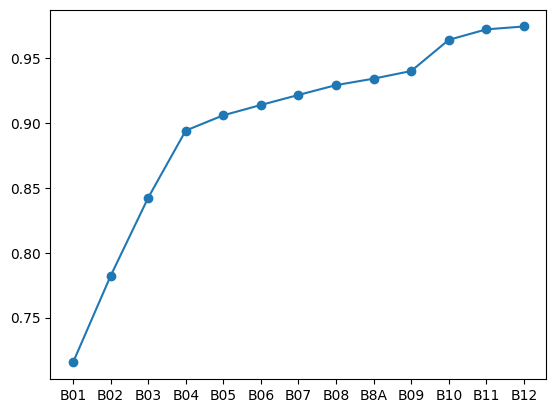

In [ ]:
# Transmitancias:

transm = []
#atm = []
for i in ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']:
    transm.append(atm_parametros[i]['T_upward'] * atm_parametros[i]['T_downward'])
    #atm.append(atm_parametros[i]['p_atm'])

import matplotlib.pyplot as plt
plt.plot(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12'], transm, marker='o', linestyle='-')
#plt.plot(['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12'], atm, marker='o', linestyle='-')

In [ ]:
# Correcao atmosferica:
# Funcoes auxiliares:
def abrir_imagem(path: str):
    dataset = gdal.Open(path)
    return dataset.ReadAsArray().astype(float)

def salvar_imagem(array: float, index: str, reference: str, dest: str) -> None:

    filename_reference = reference
    filename_out_factor = dest + '/' + index[0:-4] + '.TIF'
    dataset_reference = gdal.Open(filename_reference)

    line = dataset_reference.RasterYSize
    column = dataset_reference.RasterXSize
    bands = 1

    driver = gdal.GetDriverByName('GTiff')
    data_type = gdal.GetDataTypeByName('Float32')
    dataset_output = driver.Create(filename_out_factor, column, line, bands, data_type)
    dataset_output.SetGeoTransform(dataset_reference.GetGeoTransform())
    dataset_output.SetProjection(dataset_reference.GetProjectionRef())
    dataset_output.GetRasterBand(1).WriteArray(array)
    dataset_output=None
    return None

In [ ]:
# Correcao atmosferica:
import os
dir_img = r'/content/drive/MyDrive/04 - Doutorado - INPE/Princípios Físicos/Pratica2/L1C_T23KMV_A037344_20240430T131241'
os.makedirs('img_corrigida', exist_ok=True)

for banda in atm_parametros:
    img_id = [i for i in os.listdir(dir_img) if banda in i][0]
    caminho_img = dir_img + '/' + img_id

    # Conversao de DN para reflectancia TOA:
    # Abrir imagens:
    array = abrir_imagem(caminho_img)
    QUANTIFICATION_VALUE = 10000
    RADIO_ADD_OFFSET = -1000
    ref_toa = (array + RADIO_ADD_OFFSET) / QUANTIFICATION_VALUE

    # Correcao atmosferica -- Equacao de transferecia radiativa:
    Tatm = atm_parametros[banda]['T_upward'] * atm_parametros[banda]['T_downward']
    Tg = atm_parametros[banda]['tg_OG_co'] * atm_parametros[banda]['tg_OG_c02'] * atm_parametros[banda]['tg_OG_o2'] * atm_parametros[banda]['tg_OG_no2'] * atm_parametros[banda]['tg_OG_ch4']
    Tg_O3 = atm_parametros[banda]['Tg_O3']
    Tg_H20 = atm_parametros[banda]['Tg_H20']
    p_atm = atm_parametros[banda]['p_atm']
    s = atm_parametros[banda]['s']

    A = ((ref_toa / (Tg * Tg_O3)) - p_atm) / (Tatm * Tg_H20)
    ref_sup = A / (1 - (A * s))

    salvar_imagem(ref_sup, img_id, caminho_img, r'img_corrigida')

# https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/level-1c/algorithm-overview#:~:text=Before%20storage%20inside%20L1C%20(in,computed%20TOA%20reflectance%20(%CF%81).&text=The%20L1C%20product's%20metadata%20includes,defined%20as%20a%20negative%20value.

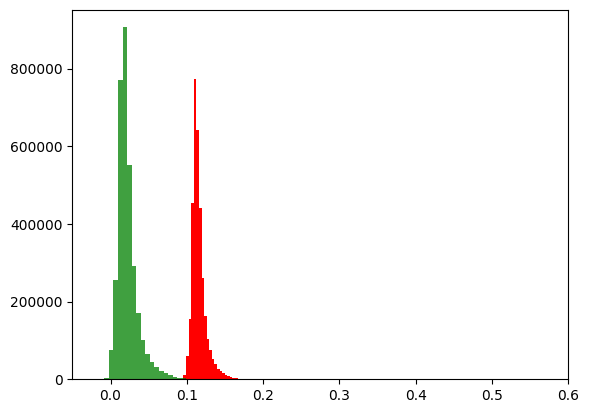

In [ ]:
# Plotando o histograma das imagens:
r_toa = abrir_imagem(r'/content/drive/MyDrive/04 - Doutorado - INPE/Princípios Físicos/Pratica2/L1C_T23KMV_A037344_20240430T131241/T23KMV_20240430T131239_B01.TIF')
r_toa = (r_toa + (-1000)) / 10000

r_surperficie = abrir_imagem(r'/content/drive/MyDrive/04 - Doutorado - INPE/Princípios Físicos/Pratica2/L1C_T23KMV_A037344_20240430T131241/img_corrigida/T23KMV_20240430T131239_B01.TIF')

plt.hist(r_toa.flatten(), bins=250, color='red', edgecolor=None)
plt.hist(r_surperficie.flatten(), bins=250, color='green', edgecolor=None, alpha=0.75)
plt.xlim(-0.05, 0.6)
plt.show()

# Correção atmosférica 2

In [ ]:
# Variaveis de Entrada:

# Atmosfera + alvo:
AOD550 = 0.05
Altitude = 0.01 # km

# Imagem:
dia = 12
mes = 9
Geometria_solar_AZ = 0.5
Geometria_solar_Zn = 0.5
Geometria_sensor_AZ = 0.5
Geometria_sensor_Zn = 0.5


In [ ]:
# Com o 6SV:
# Define a classe SixS() -> classe principal do 6SV, ela permite a config. de paramteros, executar e acessar as saidas do 6SV:

s = SixS()

In [ ]:
# Definindo os parametros do 6SV:

# Perfil atmosferico:
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.Tropical)

# Tipos pre-definidos: Sub-Arctic Winter, Mid-Latitude Winte, U.S. Standart, Sub-Arctic Summer, Mid-Latitude Summer, Tropical
# Esses modelos sao padroes derivados do MODITRAN (http://modtran.spectral.com/static/modtran6/html/help_atmosphere_model.html?v=3)
# Escolher um desses parametros significa definifir os valores de vapor d'agua e temperatura do ar esperados para a imagem.

#s.atmos_profile = py6s.AtmosProfile.UserWaterAndOzone(water_vapour, ozone)

In [ ]:
# Carga optica do aerossol:

s.aot550 = AOD550

In [ ]:
# Geometrias de iluminacao (solar) e visada (sensor):

s.geometry = Geometry.User()
s.geometry.day = dia
s.geometry.month = mes
s.geometry.solar_z = Geometria_solar_Zn
s.geometry.solar_a = Geometria_solar_AZ
s.geometry.view_z = Geometria_sensor_Zn
s.geometry.view_a = Geometria_sensor_AZ

In [ ]:
# Altitude:

s.altitudes = Altitudes()
s.altitudes.set_sensor_satellite_level()  # nivel do sensor;
s.altitudes.set_target_custom_altitude(Altitude)  # nivel do alvo (em km).

In [ ]:
# Configurar os comprimentos de ondas das bandas espectrais:

# Interpolacao da Funcao de Resposta Espectral:
def rsr_interp(rsr, band_number: int, range_w: list) -> dict:
        """
        It interpolates the RSR in 2.5 nm.
        """
        output = {}
        for i in range(1, band_number + 1):
            filter_ = rsr.loc[rsr['id'] == i]
            w_min_ = np.min(filter_['wavelength'])
            w_max_ = np.max(filter_['wavelength'])
            # Range required --it interpolates at 2.5 nm:
            wavelength_ = [np.around(w, 3) for w in np.arange(w_min_, w_max_, 0.001)]
            wavelength_int = [np.around(w, 3) for w in np.arange(range_w[0], range_w[1], 0.001)]
            wavelength_sub = list(set(wavelength_int) - set(wavelength_))
            df_ = pd.DataFrame({'wavelength': wavelength_sub, 'rsr': int(0), 'band': str(i)})
            df_ = pd.concat([filter_, df_]).sort_values(by=['wavelength'], ascending=True)
            d_select = df_['rsr'].to_list()
            wavelength_interp = [np.around(w, 4) for w in np.arange(range_w[0], range_w[1], 0.0025)]
            norm = np.interp(wavelength_interp, df_['wavelength'].to_list(), d_select).tolist()
            out_ = [norm, [i for i in wavelength_interp]]
            output[i] = out_
        return output

#rsr = pd.read_csv(r'auxiliar/rsr_S2B_MSI.txt', sep='\t', skiprows=5, names=['wavelength', 'rsr', 'band', 'id'])
bandas = rsr_interp(rsr, 13, [0.412, 2.321])

In [ ]:
# Modelagem atmosferica com o 6SV:
atm_parametros = {}

for i in range(0, 13):
    s.wavelength = Wavelength(np.min(bandas[i + 1][1]), np.max(bandas[i + 1][1]), bandas[i + 1][0]) # min comprimento de onda, max comp.onda, rsr (2.5 nm).
    s.run()
    atm_parametros[i] = {'tg_OG_co': float(s.outputs.transmittance_co.total),
                         'tg_OG_c02': float(s.outputs.transmittance_co2.total),
                         'tg_OG_o2': float(s.outputs.transmittance_oxygen.total),
                         'tg_OG_no2': float(s.outputs.transmittance_no2.total),
                         'tg_OG_ch4': float(s.outputs.transmittance_ch4.total),
                         'Tg_O3': float(s.outputs.transmittance_ozone.total),
                         'Tg_H20': float(s.outputs.transmittance_water.total),
                         'T_upward': float(s.outputs.transmittance_total_scattering.upward),
                         'T_downward': float(s.outputs.transmittance_total_scattering.downward),
                         'p_atm': float(s.outputs.atmospheric_intrinsic_reflectance)}
    print(atm_parametros)

{0: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 1.0, 'tg_OG_ch4': 1.0, 'Tg_O3': 0.99876, 'Tg_H20': 1.0, 'T_upward': 0.88829, 'T_downward': 0.88829, 'p_atm': 0.097}}
{0: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 1.0, 'tg_OG_ch4': 1.0, 'Tg_O3': 0.99876, 'Tg_H20': 1.0, 'T_upward': 0.88829, 'T_downward': 0.88829, 'p_atm': 0.097}, 1: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 1.0, 'tg_OG_ch4': 1.0, 'Tg_O3': 0.9879, 'Tg_H20': 1.0, 'T_upward': 0.92258, 'T_downward': 0.92258, 'p_atm': 0.065}}
{0: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 1.0, 'tg_OG_ch4': 1.0, 'Tg_O3': 0.99876, 'Tg_H20': 1.0, 'T_upward': 0.88829, 'T_downward': 0.88829, 'p_atm': 0.097}, 1: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 1.0, 'tg_OG_ch4': 1.0, 'Tg_O3': 0.9879, 'Tg_H20': 1.0, 'T_upward': 0.92258, 'T_downward': 0.92258, 'p_atm': 0.065}, 2: {'tg_OG_co': 1.0, 'tg_OG_c02': 1.0, 'tg_OG_o2': 1.0, 'tg_OG_no2': 

In [ ]:
# Correcao atmosferica: